In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
from xgcm import Grid
import numpy as np
import scipy.optimize
import cmocean
# import warnings
# warnings.filterwarnings("ignore")

In [2]:
#1/4 degree resolution, surface diagnostics are for uppermost 5 meters.
p4 = '/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.25deg_N15_baseline_hmix5/'
os1 = xr.open_mfdataset([p4+'/sub%2.2i/ocean.stats.nc'%(i+1) for i in range(2)], decode_times=False)

#1/8 degree resolution, surface diagnostics are for uppermost 5 meters.
p8 = '/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.125deg_N15_baseline_hmix5/'
os2 = xr.open_mfdataset([p8+'/sub%2.2i/ocean.stats.nc'%(i+1) for i in range(2)], decode_times=False)

#1/16 degree resolution, surface diagnostics are for uppermost 5 meters.
p16 = '/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.0625deg_N15_baseline_hmix5/'
os3 = xr.open_mfdataset([p16+'/sub%2.2i/ocean.stats.nc'%(i+1) for i in range(5)], decode_times=False)

#1/32 degree resolution, surface diagnostics are for uppermost 5 meters.
p32 = '/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.03125deg_N15_baseline_hmix5'
os4 = xr.open_mfdataset([p32+'/sub%2.2i/ocean.stats.nc'%(i+1) for i in range(20)], decode_times=False)

In [3]:
# time1=np.arange(os1.Time.shape[0])*5
# time2=time1[-1]+np.arange(os2.Time.shape[0])*5
# time3=time2[-1]+np.arange(os3.Time.shape[0])*5
# time4=time3[-1]+np.arange(os4.Time.shape[0])*5

In [4]:
r = np.array([4,8,16,32]) # Number of cells per degree of longitude
KE_series = np.array([os1.KE[-100:].sum(axis=1).mean('Time'),
                      os2.KE[-100:].sum(axis=1).mean('Time'),
                      os3.KE[-100:].sum(axis=1).mean('Time'),
                      os4.KE[-100:].sum(axis=1).mean('Time')])/1000
APE_series = np.array([os1.APE[-100:].sum(axis=1).mean('Time'),
                       os2.APE[-100:].sum(axis=1).mean('Time'),
                       os3.APE[-100:].sum(axis=1).mean('Time'),
                       os4.APE[-100:].sum(axis=1).mean('Time')])/1000
TE_series = np.array([os1.En[-100:].mean('Time'),
                      os2.En[-100:].mean('Time'),
                      os3.En[-100:].mean('Time'),
                      os4.En[-100:].mean('Time')])/1000

In [5]:
# Values based on filtered data (from Elizabeth)
ke2 = np.array( [0.53, 1.19, 1.71, 2.15])*1e15
pe2 = np.array( [1.83, 1.77, 1.73, 1.71])*1e17-7.8e16
te2 = ke2 + pe2

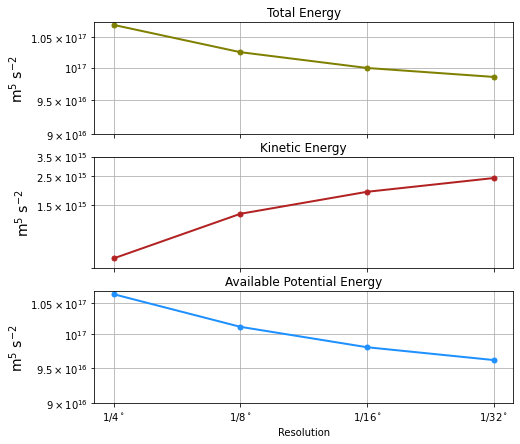

In [6]:
f, (ax3,ax1,ax2) = plt.subplots(3,1,figsize=(7.5,7), sharex=True); colors = ['#B22222','#1E90FF','#808000']

ax3.loglog(r, TE_series, '.-', color=colors[2], markersize=10, linewidth=2)
ax3.grid()
ax3.minorticks_off()
ax3.set_yticks([0.9e17, 0.95e17, 1e17, 1.05e17])
ax3.set_ylabel(r'm$^5$ s$^{-2}$', fontsize=14)
ax3.set_title('Total Energy');

ax1.loglog(r, KE_series, '.-', color=colors[0], markersize=10, linewidth=2)
ax1.grid()
ax1.minorticks_off()
# ax1.set_ylim([0.1e15, 4e15])
ax1.set_yticks([0.5e15, 1.5e15, 2.5e15, 3.5e15])
ax1.set_ylabel(r'm$^5$ s$^{-2}$', fontsize=14)
ax1.set_title('Kinetic Energy')

ax2.loglog(r, APE_series, '.-', color=colors[1], markersize=10, linewidth=2)
ax2.grid()
ax2.set_xticks(r)
ax2.minorticks_off()
ax2.set_xticklabels(['$1/4^\circ$', '$1/8^\circ$', '$1/16^\circ$', '$1/32^\circ$'])
# ax2.set_ylim([0.9e17, 1.1e17])
ax2.set_yticks([0.9e17, 0.95e17, 1e17, 1.05e17])
ax2.set_ylabel(r'm$^5$ s$^{-2}$', fontsize=14)
ax2.set_title('Available Potential Energy')
ax2.set_xlabel('Resolution');

In [7]:
# f, (ax3,ax1,ax2) = plt.subplots(3,1,figsize=(7.5,7)); colors = ['#B22222','#1E90FF','#808000']

# ax3.loglog(r, TE_series, '.-', color=colors[2], markersize=10, linewidth=2)
# ax3.plot(r, te2, 'x:', color=colors[2], markersize=10, linewidth=2)
# ax3.grid()
# ax3.set_xticks(r)
# ax3.minorticks_off()
# ax3.set_xticklabels([])
# # ax3.set_ylim([0.9e17, 1.1e17])
# ax3.set_yticks([0.9e17, 0.95e17, 1e17, 1.05e17])
# ax3.set_ylabel(r'm$^5$ s$^{-2}$', fontsize=14)
# ax3.set_title('Total Energy');

# ax1.loglog(r, KE_series, '.-', color=colors[0], markersize=10, linewidth=2)
# ax1.plot(r, ke2, 'x:', color=colors[0], markersize=10, linewidth=2)
# ax1.grid()
# ax1.set_xticks(r)
# ax1.set_xticklabels([])
# ax1.minorticks_off()
# # ax1.set_ylim([0.1e15, 4e15])
# ax1.set_yticks([0.5e15, 1.5e15, 2.5e15, 3.5e15])
# ax1.set_ylabel(r'm$^5$ s$^{-2}$', fontsize=14)
# ax1.set_title('Kinetic Energy')

# ax2.loglog(r, APE_series, '.-', color=colors[1], markersize=10, linewidth=2)
# ax2.plot(r, pe2, 'x:', color=colors[1], markersize=10, linewidth=2)
# ax2.grid()
# ax2.set_xticks(r)
# ax2.minorticks_off()
# ax2.set_xticklabels(['$1/4^\circ$', '$1/8^\circ$', '$1/16^\circ$', '$1/32^\circ$'])
# # ax2.set_ylim([0.9e17, 1.1e17])
# ax2.set_yticks([0.9e17, 0.95e17, 1e17, 1.05e17])
# ax2.set_ylabel(r'm$^5$ s$^{-2}$', fontsize=14)
# ax2.set_title('Available Potential Energy')
# ax2.set_xlabel('Resolution');

# # f.savefig('energy_by_resolution_linear.png',dpi=300,bbox_inches='tight',pad_inches=0.1) # dpi=300,

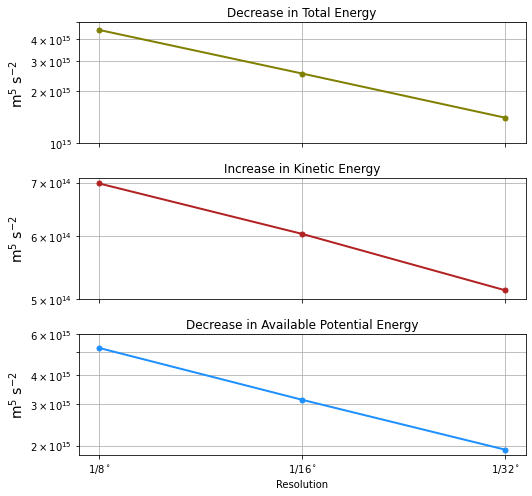

In [8]:
f, (ax3,ax1,ax2) = plt.subplots(3,1,figsize=(7.5,7), sharex=True); colors = ['#B22222','#1E90FF','#808000']
rd = [8,16,32]

ax3.loglog(rd, -np.diff(TE_series), '.-', color=colors[2], markersize=10, linewidth=2)
ax3.grid()
ax3.set_yticks([1e15, 2e15, 3e15, 4e15, 5e15])
ax3.set_ylabel(r'm$^5$ s$^{-2}$', fontsize=14)
ax3.set_title('Decrease in Total Energy');

ax1.loglog(rd, np.diff(KE_series), '.-', color=colors[0], markersize=10, linewidth=2)
ax1.grid()
ax1.set_yticks([5e14, 6e14, 7e14])
ax1.set_ylabel(r'm$^5$ s$^{-2}$', fontsize=14)
ax1.set_title('Increase in Kinetic Energy')

ax2.loglog(rd, -np.diff(APE_series), '.-', color=colors[1], markersize=10, linewidth=2)
ax2.grid()
ax2.set_xticks(rd)
ax2.minorticks_off()
ax2.set_xticklabels(['$1/8^\circ$', '$1/16^\circ$', '$1/32^\circ$'])
ax2.set_yticks([2e15, 3e15, 4e15, 5e15, 6e15])
ax2.set_ylabel(r'm$^5$ s$^{-2}$', fontsize=14)
ax2.set_title('Decrease in Available Potential Energy')
ax2.set_xlabel('Resolution');

plt.tight_layout()

In [9]:
def fn(r, f0, a, r0, p):
    return f0 + a * ( r - r0 )**p

re = np.array([4,8,16,32,64,128,256,512,1024,2048])
re = np.linspace(3.9,72,100)
# re = np.linspace(3.9,1030,1000)
# re = r

# Fit total energy
pte,_ = scipy.optimize.curve_fit(fn, r, TE_series, p0=(9.26e16, 1.84e16, 2, -.33), bounds=( (0, 0, -.1, -2), (1e18, 1e17, 2, 0) ))
fte0, fte = pte[0], fn(re, *pte)
print('fte0={:e} a={:e} r0={:f} p={:f}'.format(*pte))

# Fit APE
ppe,_ = scipy.optimize.curve_fit(fn, r, APE_series, p0=(8.6e16, 1.84e16, 2, -.33), bounds=( (0, 0, -.1, -2), (1e18, 1e17, 2, 0) ))
fpe0, fpe = ppe[0], fn(re, *ppe)
print('fpe0={:e} a={:e} r0={:f} p={:f}'.format(*ppe))

# Fit KE
pke,_ = scipy.optimize.curve_fit(fn, r, KE_series, bounds=( (0, -1e17, -.1, -2), (1e18, 0, 2, -.2) ), sigma=(5e14,1e14,1e14,1e14) )
fke0, fke = pke[0], fn(re, *pke)
print('fke0={:e} a={:e} r0={:f} p={:f}'.format(*pke))

# KE fit is difference of TE and APE
# fke0,fke = fte0 - fpe0, fte - fpe
# TE fit is sum of KE and APE
# fte0,fte = fke0 + fpe0, fke + fpe

fte0=9.679962e+16 a=3.418565e+16 r0=-0.088104 p=-0.858759
fpe0=9.298790e+16 a=3.310651e+16 r0=0.234320 p=-0.681119
fke0=5.283670e+15 a=-6.568132e+15 r0=-0.100000 p=-0.238400


/glade/u/home/adcroft/.conda/envs/mypy38/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


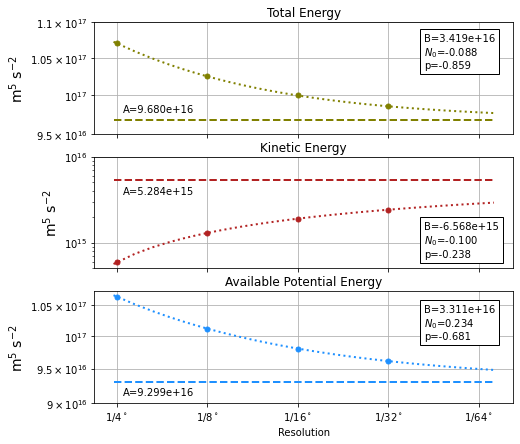

In [11]:
f, (ax3,ax1,ax2) = plt.subplots(3,1,figsize=(7.5,7), sharex=True); colors = ['#B22222','#1E90FF','#808000']

ax3.loglog(r, TE_series, '.', color=colors[2], markersize=10, linewidth=2)
ax3.plot(re, fte, ':', color=colors[2], markersize=10, linewidth=2)
ax3.plot(re, fte0+0*re, '--', color=colors[2], markersize=10, linewidth=2)
ax3.grid()
ax3.minorticks_off()
# ax3.set_ylim([0.9e17, 1.1e17])
ax3.set_yticks([0.95e17, 1e17, 1.05e17, 1.1e17])
ax3.set_ylabel(r'm$^5$ s$^{-2}$', fontsize=14)
ax3.set_title('Total Energy');
ax3.text(4.2,1.01*pte[0],'A=%.3e'%(pte[0]))
ax3.text(42,1.07*pte[0],'B=%.3e\n$N_0$=%.3f\np=%.3f'%(pte[1],pte[2],pte[3]), bbox=dict(facecolor='w', edgecolor='k'))

ax1.loglog(r, KE_series, '.', color=colors[0], markersize=10, linewidth=2)
ax1.plot(re, fke, ':', color=colors[0], markersize=10, linewidth=2)
ax1.plot(re, fke0+0*re, '--', color=colors[0], markersize=10, linewidth=2)
ax1.grid()
ax1.set_ylim([0.5e15, 10e15])
# ax1.set_yticks([1e15, 2e15, 3e15, 4e15, 5e15, 6e15, 7e15, 8e15, 9e15, 10e15])
ax1.set_ylabel(r'm$^5$ s$^{-2}$', fontsize=14)
ax1.set_title('Kinetic Energy')
ax1.text(4.2,.7*fke0,'A=%.3e'%(fke0))
ax1.text(42,0.13*pke[0],'B=%.3e\n$N_0$=%.3f\np=%.3f'%(pke[1],pke[2],pke[3]), bbox=dict(facecolor='w', edgecolor='k'));

ax2.loglog(r, APE_series, '.', color=colors[1], markersize=10, linewidth=2)
ax2.plot(re, fpe, ':', color=colors[1], markersize=10, linewidth=2)
ax2.plot(re, fpe0+0*re, '--', color=colors[1], markersize=10, linewidth=2)
ax2.grid()
# ax2.set_xticks(r)
ax2.set_xticks([4,8,16,32,64])
ax2.minorticks_off()
ax2.set_xticklabels(['$1/4^\circ$', '$1/8^\circ$', '$1/16^\circ$', '$1/32^\circ$', '$1/64^\circ$'])
# ax2.set_ylim([0.9e17, 1.1e17])
ax2.set_yticks([0.9e17, 0.95e17, 1e17, 1.05e17])
ax2.set_ylabel(r'm$^5$ s$^{-2}$', fontsize=14)
ax2.set_title('Available Potential Energy')
ax2.set_xlabel('Resolution');
ax2.text(4.2,0.98*fpe0,'A=%.3e'%(fpe0))
ax2.text(42,1.07*ppe[0],'B=%.3e\n$N_0$=%.3f\np=%.3f'%(ppe[1],ppe[2],ppe[3]), bbox=dict(facecolor='w', edgecolor='k'));

f.savefig('fig-energy_by_resolution_loglog.png',dpi=300,bbox_inches='tight',pad_inches=0.1) # dpi=300,